Problem Statement:To build a classification model that predicts whether a student will be placed based on their academic performance, participation in skill development activities, and other behavioral factors.
This can help training and placement cells to identify students who may need additional support to improve their chances of placement.



Description of Columns:
StudentID:	Unique identifier for each student (not useful for prediction, just indexing).
                                                
CGPA:	Cumulative Grade Point Average (out of 10). Reflects overall academic performance.
                                                
Internships:	Number of internships completed. Demonstrates practical experience.
                                                
Projects:		Number of projects completed. Shows technical and application skills.
                                                
Workshops/Certifications:	Count of workshops or certifications attended. Indicates skill-building effort.
                                                
AptitudeTestScore:	Score in aptitude tests (out of 100). Reflects logical and analytical skills.

SoftSkillsRating:	Rating of soft skills like communication, leadership, etc. (scale of 1 to 5).
                                                
ExtracurricularActivities	object	Participation in extracurricular activities. Values: Yes or No.
                                                
PlacementTraining:	Whether the student attended placement training. Values: Yes or No.
                                                
SSC_Marks:	Marks obtained in Secondary School Certificate (10th standard).
                                                
HSC_Marks:	Marks obtained in Higher Secondary Certificate (12th standard).
                                                
PlacementStatus:	Target variable. Indicates placement outcome (Placed / NotPlaced).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/EDA7placedata v2.0 synthetic.csv',encoding='unicode_escape')

In [4]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [5]:
df.shape


(10000, 12)

In [6]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [7]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [8]:
df.tail()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [10]:
df.isna().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [11]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [12]:
df.duplicated().sum()

np.int64(0)

**Finding Outliers**


In [13]:
numerical_value=df.select_dtypes(exclude="object")
numerical_value

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
0,1,7.5,1,1,1,65,4.4,61,79
1,2,8.9,0,3,2,90,4.0,78,82
2,3,7.3,1,2,2,82,4.8,79,80
3,4,7.5,1,1,2,85,4.4,81,80
4,5,8.3,1,2,2,86,4.5,74,88
...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,85,66
9996,9997,7.4,0,1,0,90,4.8,84,67
9997,9998,8.4,1,3,0,70,4.8,79,81
9998,9999,8.9,0,3,2,87,4.8,71,85


<Axes: xlabel='StudentID'>

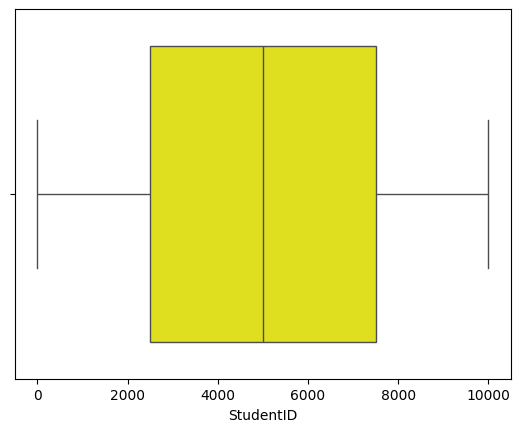

In [14]:
sns.boxplot(x='StudentID', data=df, color='yellow')

<Axes: xlabel='CGPA'>

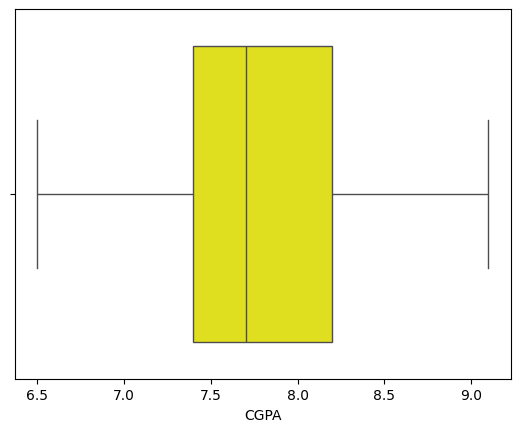

In [15]:
sns.boxplot(x='CGPA',data=df,color='yellow')

<Axes: xlabel='Internships'>

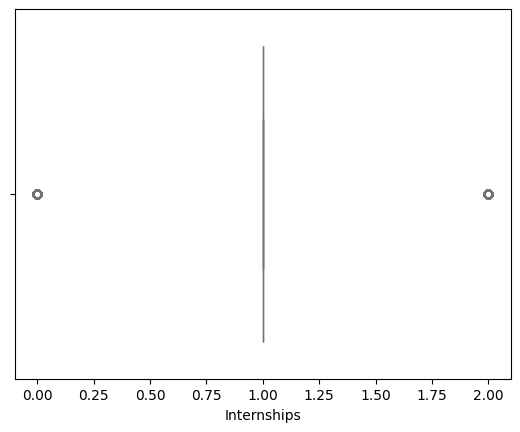

In [16]:
sns.boxplot(x='Internships', data=df, color='lightgreen')

<Axes: xlabel='Projects'>

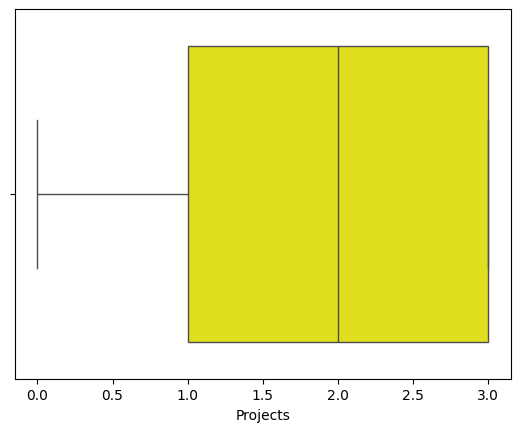

In [17]:
sns.boxplot(x='Projects', data=df, color='yellow')

<Axes: xlabel='Workshops/Certifications'>

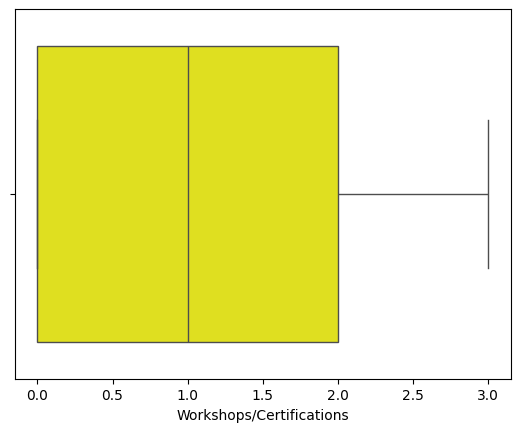

In [18]:
sns.boxplot(x='Workshops/Certifications', data=df, color='yellow')

<Axes: xlabel='AptitudeTestScore'>

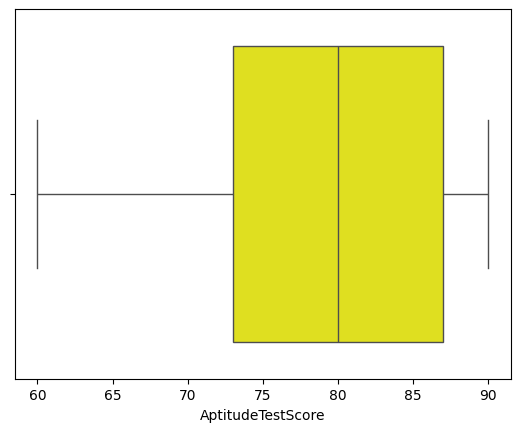

In [19]:
sns.boxplot(x='AptitudeTestScore',data=df,color='yellow')

<Axes: xlabel='SoftSkillsRating'>

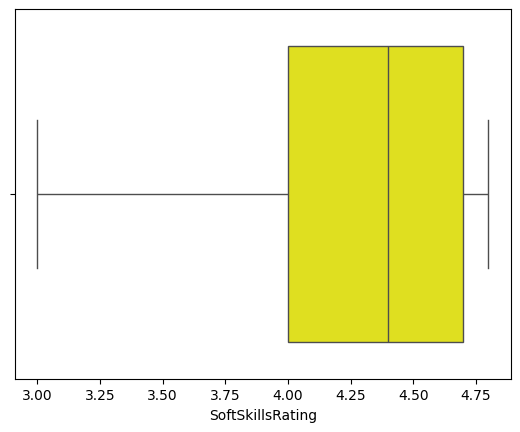

In [20]:
sns.boxplot(x='SoftSkillsRating',data=df,color='yellow')

<Axes: xlabel='SSC_Marks'>

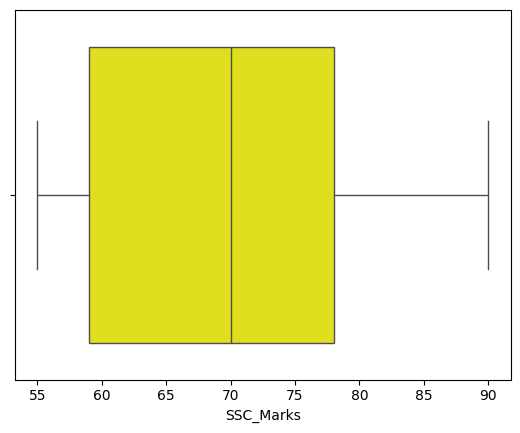

In [21]:
sns.boxplot(x='SSC_Marks',data=df,color='yellow')

<Axes: xlabel='HSC_Marks'>

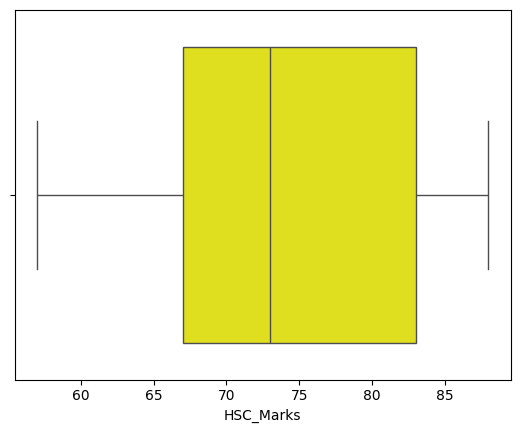

In [22]:
sns.boxplot(x='HSC_Marks',data=df,color='yellow')

Observation: From above the above all boxplot shows no outliers. So there is no need of outlier removal. Our Data is clean.

**Exploratory Data Analysis**

In [23]:
df['PlacementStatus'].value_counts()

,count
PlacementStatus,
NotPlaced,5803
Placed,4197


In [24]:
df['PlacementStatus'].min(),df['PlacementStatus'].max()

('NotPlaced', 'Placed')

Analysis of PlacementStatus with Count

Text(0, 0.5, 'Count')

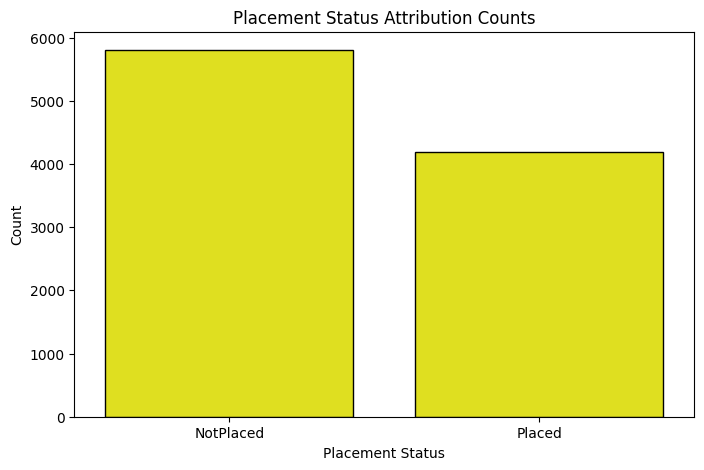

In [76]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PlacementStatus', color='yellow', edgecolor='black')
plt.title('Placement Status Attribution Counts', fontsize=12)
plt.xlabel('Placement Status', fontsize=10)
plt.ylabel('Count', fontsize=10)


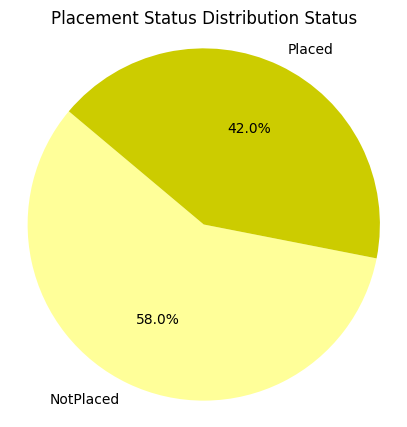

In [72]:
placement_counts = df['PlacementStatus'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(placement_counts, labels=placement_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FFFF99', '#CCCC00'])
plt.title('Placement Status Distribution Status')
plt.axis('equal')
plt.show()

Observation:From Piechart and Barplot shows that 42% of students are placed means near by 5500 above students are placed.

58% of students are not placed means near by 4000 and above studnets are placed.

In [27]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [28]:
df['StudentID'].unique()

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [29]:
df['CGPA'].unique()

array([7.5, 8.9, 7.3, 8.3, 7. , 7.7, 6.5, 7.8, 7.9, 7.4, 8.6, 8.2, 6.8,
       7.6, 6.7, 8.4, 8.5, 6.9, 8.1, 8.8, 8. , 6.6, 7.2, 7.1, 8.7, 9. ,
       9.1])

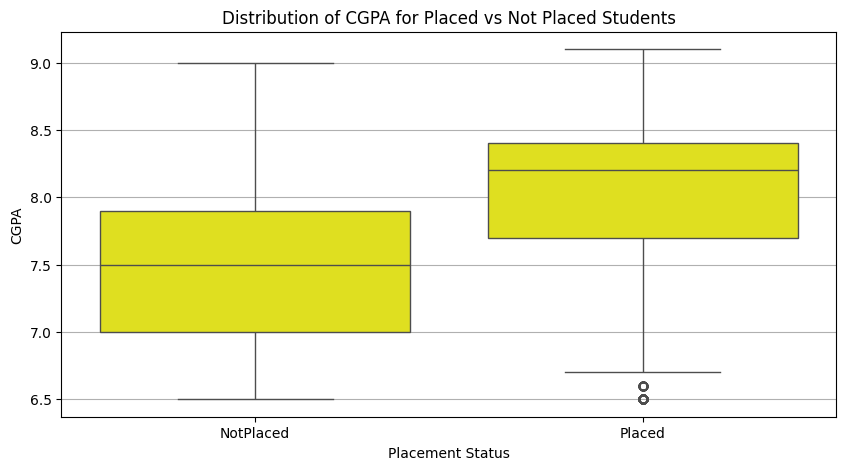

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='PlacementStatus', y='CGPA', data=df, color='yellow')
plt.title('Distribution of CGPA for Placed vs Not Placed Students')
plt.xlabel('Placement Status', fontsize=10)
plt.ylabel('CGPA', fontsize=10)
plt.grid(axis='y')

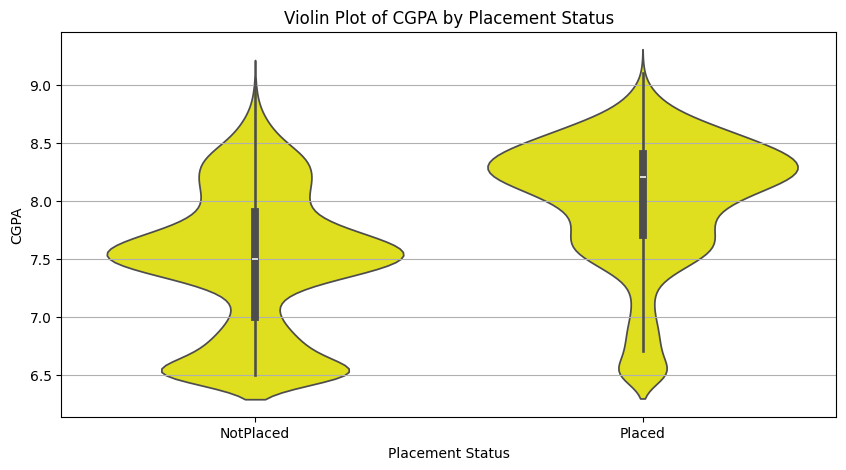

In [31]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='PlacementStatus', y='CGPA', data=df, color='yellow')
plt.title('Violin Plot of CGPA by Placement Status')
plt.xlabel('Placement Status', fontsize=10)
plt.ylabel('CGPA', fontsize=10)
plt.grid(axis='y')

Observation:Students who have CGPA between less than 7 and less than 8 are not placed.

Students who have CGPA greater than 7.5 and less than 8.5 are placed.

In [32]:
df['Internships'].unique()

array([1, 0, 2])

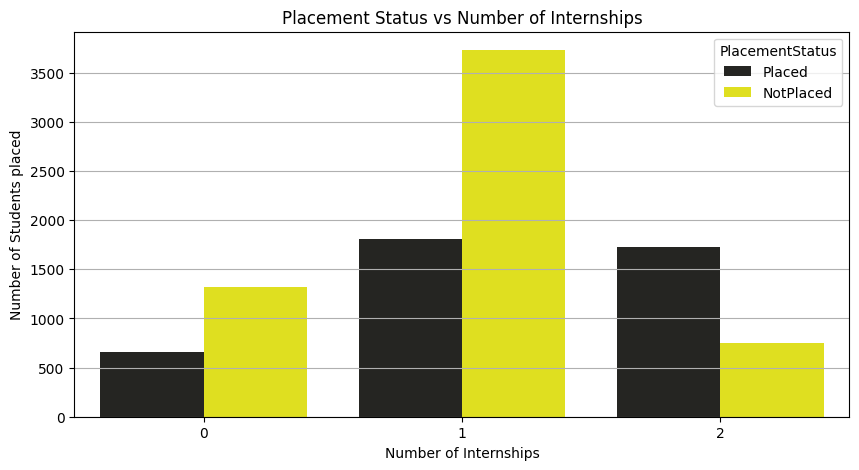

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Internships', hue='PlacementStatus', data=df, color='yellow')
plt.title('Placement Status vs Number of Internships')
plt.xlabel('Number of Internships')
plt.ylabel('Number of Students placed')
plt.grid(axis='y')
plt.show()

We observe that students who have completed only one internship form the largest group among both Placed and NotPlaced categories. This suggests that doing one internship is common, but it does not guarantee placement. Other factors like CGPA, skills, or projects might also play a crucial role.

In [34]:
df['Projects'].unique()

array([1, 3, 2, 0])

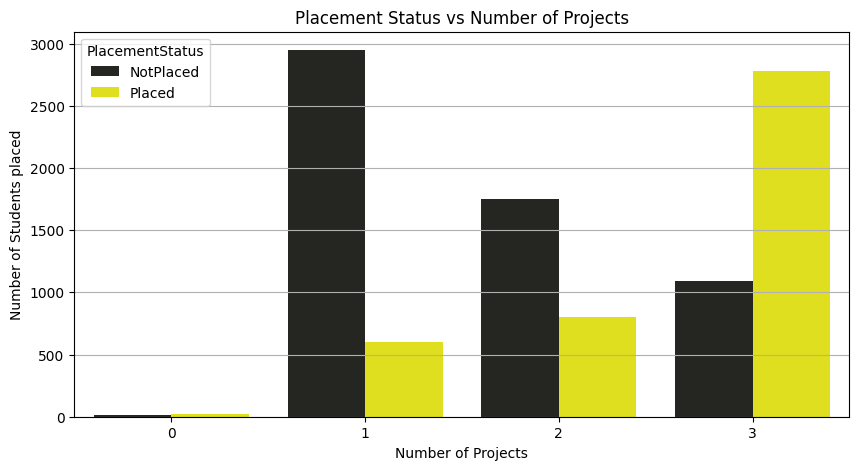

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Projects', hue='PlacementStatus', data=df, color='yellow')
plt.title('Placement Status vs Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Students placed')
plt.grid(axis='y')
plt.show()

Observation: Students who are not doing any project they are not placed its clear shown here.

Students which are doing 3 projects they are placed i.e more than 2500.



In [36]:
df['Workshops/Certifications'].unique()

array([1, 2, 0, 3])

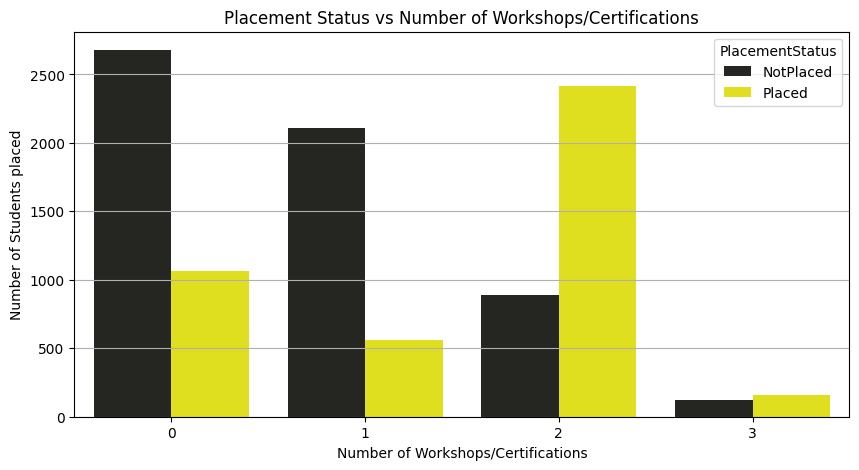

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Workshops/Certifications', hue='PlacementStatus', data=df, color='yellow')
plt.title('Placement Status vs Number of Workshops/Certifications')
plt.xlabel('Number of Workshops/Certifications')
plt.ylabel('Number of Students placed')
plt.grid(axis='y')
plt.show()

In [38]:
df['AptitudeTestScore'].unique()

array([65, 90, 82, 85, 86, 71, 76, 84, 79, 74, 66, 78, 73, 70, 72, 77, 60,
       81, 63, 75, 67, 89, 88, 62, 80, 68, 87, 69, 83, 64, 61])

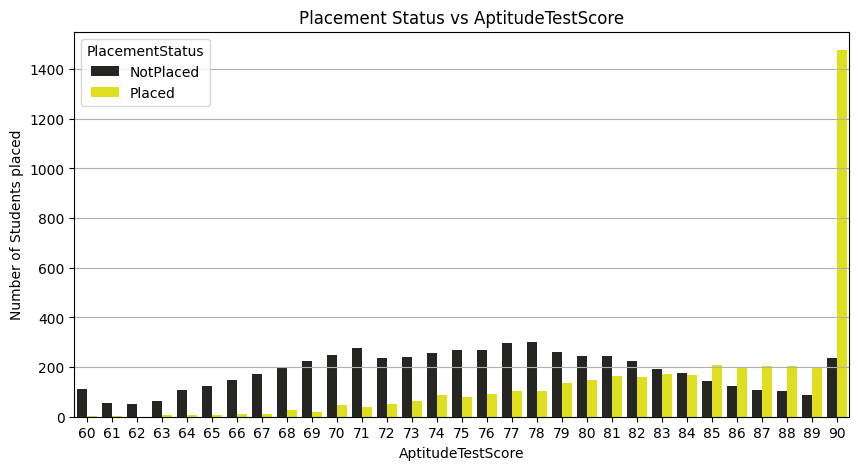

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x='AptitudeTestScore', hue='PlacementStatus', data=df, color='yellow')
plt.title('Placement Status vs AptitudeTestScore')
plt.xlabel('AptitudeTestScore')
plt.ylabel('Number of Students placed')
plt.grid(axis='y')
plt.show()

Observation:From CountPlot we can see that the students who have 90 AptitudeTestScore are more placed.The student who have less than 62 AptitudeTestScore are not placed.

In [40]:
df['SoftSkillsRating'].unique()

array([4.4, 4. , 4.8, 4.5, 4.2, 3.5, 3.9, 4.6, 4.1, 4.7, 3.4, 3.8, 4.3,
       3.6, 3.3, 3.2, 3.7, 3. , 3.1])

In [41]:
df['SSC_Marks'].unique()

array([61, 78, 79, 81, 74, 55, 62, 59, 75, 85, 82, 71, 84, 63, 72, 58, 77,
       56, 68, 76, 64, 66, 60, 65, 80, 70, 57, 86, 90, 73, 69, 83, 87, 67,
       88, 89])

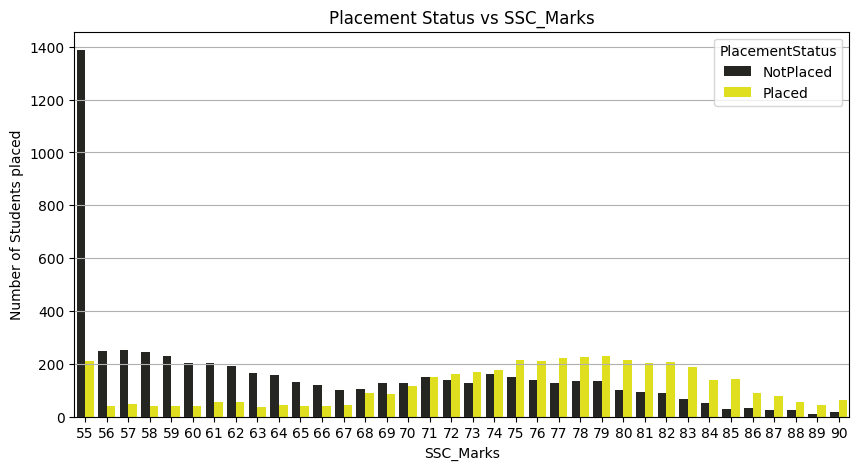

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SSC_Marks', hue='PlacementStatus', data=df, color='yellow')
plt.title('Placement Status vs SSC_Marks')
plt.xlabel('SSC_Marks')
plt.ylabel('Number of Students placed')
plt.grid(axis='y')
plt.show()

Observation:From Count plot we can see that the students who have less than 64 SSC_Score have less chances to places.And the students who have SSC_score between 71 an 85 have more chance to place.

In [43]:
df['HSC_Marks'].unique()

array([79, 82, 80, 88, 66, 65, 72, 71, 86, 87, 83, 73, 78, 63, 75, 69, 57,
       61, 85, 68, 81, 84, 60, 67, 64, 76, 70, 62, 74, 59, 58, 77])

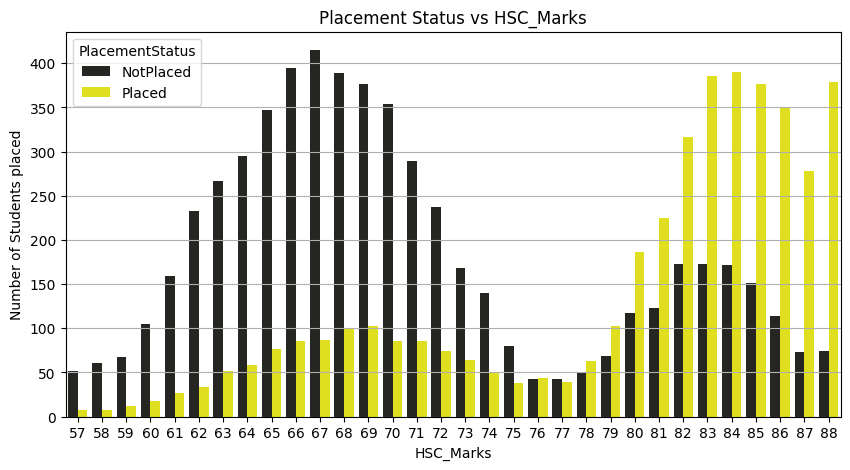

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(x='HSC_Marks', hue='PlacementStatus', data=df, color='yellow')
plt.title('Placement Status vs HSC_Marks')
plt.xlabel('HSC_Marks')
plt.ylabel('Number of Students placed')
plt.grid(axis='y')
plt.show()

Observation: Students who have less tha 75 HSC percentage have less chnace to placed.Studnets who have more than 79 percentage have high chance to palced.

**Correlation**

In [45]:
num=df.select_dtypes(include='number')
num

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
0,1,7.5,1,1,1,65,4.4,61,79
1,2,8.9,0,3,2,90,4.0,78,82
2,3,7.3,1,2,2,82,4.8,79,80
3,4,7.5,1,1,2,85,4.4,81,80
4,5,8.3,1,2,2,86,4.5,74,88
...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,85,66
9996,9997,7.4,0,1,0,90,4.8,84,67
9997,9998,8.4,1,3,0,70,4.8,79,81
9998,9999,8.9,0,3,2,87,4.8,71,85


In [46]:
correlation=num.corr()
correlation

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
StudentID,1.000000,0.005724,0.015655,0.015924,0.011872,0.020314,-0.002269,-0.003082,0.024115
CGPA,0.005724,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.404971,0.462313
Internships,0.015655,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.279837,0.317149
Projects,0.015924,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.499421,0.535708
Workshops/Certifications,0.011872,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373045,0.418442
AptitudeTestScore,0.020314,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.513044,0.565105
SoftSkillsRating,-0.002269,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.430734,0.466912
SSC_Marks,-0.003082,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,1.000000,0.524916
HSC_Marks,0.024115,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.524916,1.000000


<Axes: >

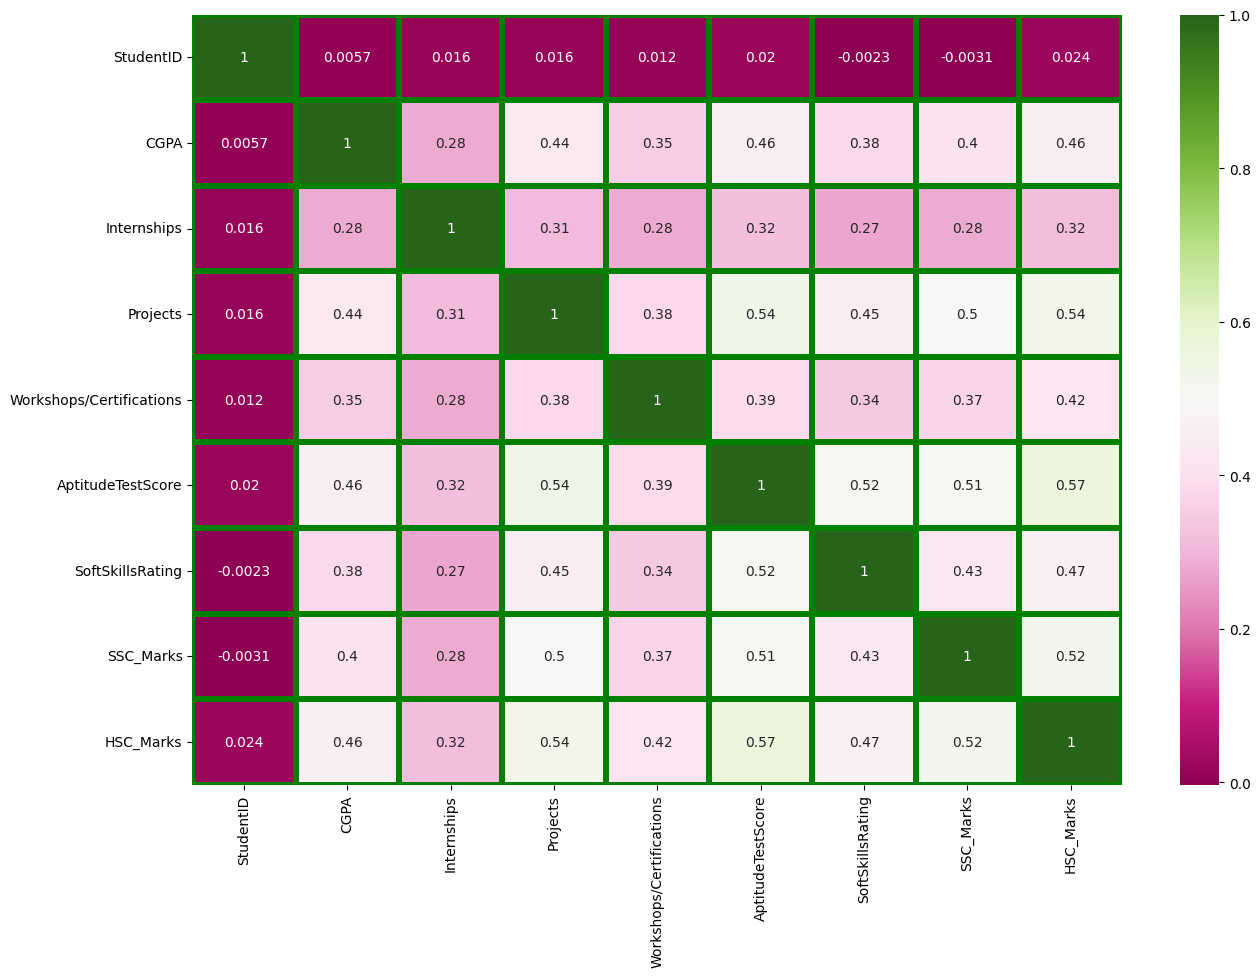

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor="g",cmap='PiYG')

Observation: There is a high correlation between CGPA and HSC_Marks.

**Encoding**

In [48]:
#One hot encoding
df1=pd.get_dummies(df,dtype=int,drop_first=True)
df1

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_Yes,PlacementTraining_Yes,PlacementStatus_Placed
0,1,7.5,1,1,1,65,4.4,61,79,0,0,0
1,2,8.9,0,3,2,90,4.0,78,82,1,1,1
2,3,7.3,1,2,2,82,4.8,79,80,1,0,0
3,4,7.5,1,1,2,85,4.4,81,80,1,1,1
4,5,8.3,1,2,2,86,4.5,74,88,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,85,66,1,0,0
9996,9997,7.4,0,1,0,90,4.8,84,67,0,0,1
9997,9998,8.4,1,3,0,70,4.8,79,81,1,1,1
9998,9999,8.9,0,3,2,87,4.8,71,85,1,1,1


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   StudentID                      10000 non-null  int64  
 1   CGPA                           10000 non-null  float64
 2   Internships                    10000 non-null  int64  
 3   Projects                       10000 non-null  int64  
 4   Workshops/Certifications       10000 non-null  int64  
 5   AptitudeTestScore              10000 non-null  int64  
 6   SoftSkillsRating               10000 non-null  float64
 7   SSC_Marks                      10000 non-null  int64  
 8   HSC_Marks                      10000 non-null  int64  
 9   ExtracurricularActivities_Yes  10000 non-null  int64  
 10  PlacementTraining_Yes          10000 non-null  int64  
 11  PlacementStatus_Placed         10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB

In [50]:
X=df1.drop('PlacementStatus_Placed',axis=1)
Y=df1['PlacementStatus_Placed']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [52]:
#Shape of the training and test dataset
print('Shape of x_train is -',x_train.shape)
print('Shape of y_train is -',y_train.shape)
print('Shape of x_test is -',x_test.shape)
print('Shape of y_test is -',y_test.shape)

Shape of x_train is - (8000, 11)
Shape of y_train is - (8000,)
Shape of x_test is - (2000, 11)
Shape of y_test is - (2000,)


**Decision tree Classifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [54]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
prediction=model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y_test, prediction)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7295


In [57]:
print("\nClassification Report:")
print(classification_report(y_test, prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1124
           1       0.69      0.69      0.69       876

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



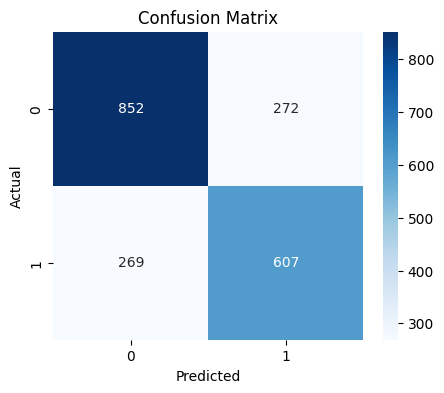

In [58]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest Classifier**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = clf.predict(x_test)


In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7875


In [63]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1124
           1       0.76      0.74      0.75       876

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



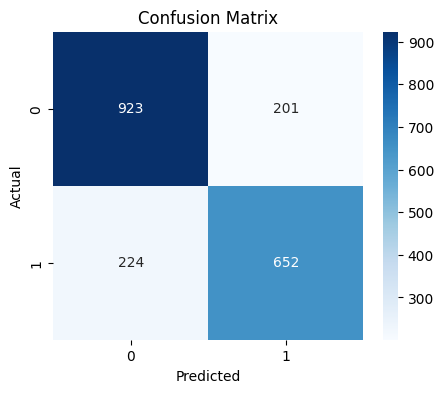

In [64]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XGBoost Classifier**

In [65]:
#XGBoost classifier
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
y_pred = model.predict(x_test)


In [67]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[910 214]
 [232 644]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1124
           1       0.75      0.74      0.74       876

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000

Accuracy Score: 0.777


**CatBoost**

In [68]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [69]:
#CatBoost
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
model.fit(x_train, y_train)


In [70]:
y_pred = model.predict(x_test)

In [71]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[928 196]
 [218 658]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1124
           1       0.77      0.75      0.76       876

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

Accuracy Score: 0.793
